In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyecharts.charts as pyc
from pyecharts import options as opts

# 读数据

In [2]:
dtypes = {   '区县id': object,
             '站名id': np.int64,
             '年份':   np.int64,
             '月份':   np.int64,
             '日期':   np.int64,
             '日照时数（单位：h)': np.float64,
             '02时风向': object,
             '08时风向': object,
             '14时风向': object,
             '20时风向': object,
             '日平均风速(单位：m/s)':   np.float64,
             '日降水量（mm）':          np.float64,
             '日最高温度（单位：℃）':  np.float64,
             '日最低温度（单位：℃）':  np.float64,
             '日平均温度（单位：℃）':  np.float64,
             '日相对湿度（单位：%）':   np.float64,
             '日平均气压（单位：hPa）': np.float64}
na_values =['*','/']
w_df = pd.read_csv('./data/train_weather.csv',dtype=dtypes, na_values=na_values,encoding='gbk').fillna(0)
w_df.columns = ['CountyID',  'StationID',   'Year',    'Month',    'Day',           'Hours',
                'F02',        'F08',          'F14',     'F20',      'WindS',
                'Rain',      'HighT',       'LowT',    'MeanT',    'Humidity',      'Pressure']
w_df.head()

,CountyID,StationID,Year,Month,Day,Hours,F02,F08,F14,F20,WindS,Rain,HighT,LowT,MeanT,Humidity,Pressure
0,county25,1,2015,1,1,6.3,NNW,N,NNE,S,1.8,0.0,14.1,7.2,9.1,43.0,980.6
1,county25,1,2015,1,2,8.1,SSE,S,SSW,S,1.3,0.0,18.3,1.6,7.5,64.0,977.7
2,county25,1,2015,1,3,4.3,S,SSE,S,SSE,2.0,0.0,18.9,2.4,9.4,66.0,973.1
3,county25,1,2015,1,4,0.0,WNW,SSW,S,SSE,2.2,0.3,14.9,9.0,11.5,76.0,966.7
4,county25,1,2015,1,5,0.0,SSE,S,SSW,C,2.8,0.8,16.8,11.6,15.5,91.0,963.9


In [2]:
w_df = pd.read_csv('./data/train_weather.csv', encoding='GBK')

C:\Users\NADPH\miniconda3\envs\bishe-env\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,10,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
len(w_df.columns)

17

In [5]:
w_df.head(1).T

,0
区县id,county25
站名id,1
年份,2015
月份,1
日期,1
日照时数（单位：h),6.3
02时风向,NNW
08时风向,N
14时风向,NNE
20时风向,S


# 数据基本信息

## 按月统计

In [3]:
wm_df = w_df.groupby(['CountyID', 'StationID', 'Year', 'Month']).sum().drop(['Day'], axis=1)

In [4]:
wm_df.head(24)

Hours  WindS   Rain   HighT   LowT  MeanT  \
CountyID StationID Year Month                                              
county1  1         2015 1      108.8   46.2   37.4   577.6  312.4  419.8   
                        2       77.7   37.9   22.5   573.9  375.0  458.8   
                        3       45.8   46.4   42.3   677.6  487.9  567.9   
                        4      155.1   50.1   43.5   856.9  544.6  682.7   
                        5      154.4   55.0   99.0   993.0  747.3  846.6   
                        6      182.2   63.4   79.8  1010.3  765.3  870.8   
                        7      141.7   54.4  235.3   994.9  754.0  855.1   
                        8      182.9   46.8  242.8  1017.5  761.8  867.3   
                        9      113.5   46.1  131.8   920.1  706.7  787.7   
                        10     169.3   42.1   56.6   895.2  593.2  713.4   
                        11      61.9   35.5   98.1   735.7  536.5  615.2   
                        12      37.8   41.2  133.2   528.8  369.5  434.8   
                   2016 1       37.3   43.4  129.1   488.2  331.5  392.1   
                        2       95.8   47.0   19.0   521.3  242.3  357.3   
                        3       31.7   43.2   38.6   657.8  454.7  545.2   
                        4       91.9   54.6  130.8   871.3  639.8  735.2   
                        5      154.4   58.4  203.8   973.0  707.2  822.9   
                        6      200.6   52.6  345.2  1016.4  765.4  865.9   
                        7      191.6   57.0   76.0  1051.4  795.6  898.9   
                        8      166.5   47.5  355.2  1039.0  781.5  878.5   
                        9      179.6   45.4   47.2   970.7  705.5  812.3   
                        10     187.5   54.0  152.8   940.3  653.1  779.0   
                        11     101.8   51.8   44.6   719.2  487.6  580.7   
                        12     144.2   49.2    4.1   684.2  373.0  500.6   

                               Humidity  Pressure  
CountyID StationID Year Month                      
county1  1         2015 1        2578.0   31200.6  
                        2        2367.0   28094.0  
                        3        2705.0   31043.1  
                        4        2310.0   29945.7  
                        5        2557.0   30744.6  
                        6        2402.0   29710.0  
                        7        2513.0   30671.7  
                        8        2535.0   30746.5  
                        9        2600.0   29868.1  
                        10       2561.0   31017.8  
                        11       2586.0   30088.2  
                        12       2623.0   31227.2  
                   2016 1        2678.0   31188.5  
                        2        2214.0   29235.3  
                        3        2600.0   31058.3  
                        4        2432.0   29837.9  
                        5        2467.0   30800.2  
                        6        2405.0   29748.5  
                        7        2480.0   30726.1  
                        8        2560.0   30645.9  
                        9        2370.0   29818.0  
                        10       2303.0   30914.8  
                        11       2443.0   30097.8  
                        12       2369.0   31171.8

# 日照

In [5]:
w_df.Hours.value_counts()

0.0     41725
8.8      1069
9.2      1064
9.5      1044
9.3      1044
        ...  
12.5       17
12.6       11
12.7        2
12.9        1
13.0        1
Name: Hours, Length: 130, dtype: int64

In [6]:
w_df[w_df.Hours==0].shape[0] / w_df.shape[0]

0.31383742882716187

无日照时间占30%

# 风速

Text(0.5, 1.0, 'wind speed')

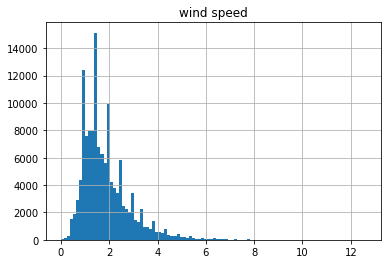

In [7]:
w_df.WindS.hist(bins=100)
plt.title('wind speed')

In [8]:
ct_25 = w_df[w_df.CountyID=='county25']
ct_25.head()

,CountyID,StationID,Year,Month,Day,Hours,F02,F08,F14,F20,WindS,Rain,HighT,LowT,MeanT,Humidity,Pressure
0,county25,1,2015,1,1,6.3,NNW,N,NNE,S,1.8,0.0,14.1,7.2,9.1,43.0,980.6
1,county25,1,2015,1,2,8.1,SSE,S,SSW,S,1.3,0.0,18.3,1.6,7.5,64.0,977.7
2,county25,1,2015,1,3,4.3,S,SSE,S,SSE,2.0,0.0,18.9,2.4,9.4,66.0,973.1
3,county25,1,2015,1,4,0.0,WNW,SSW,S,SSE,2.2,0.3,14.9,9.0,11.5,76.0,966.7
4,county25,1,2015,1,5,0.0,SSE,S,SSW,C,2.8,0.8,16.8,11.6,15.5,91.0,963.9


In [9]:
F_day = pd.DataFrame({
    'F02': ct_25.F02.value_counts(),
    'F08': ct_25.F08.value_counts(),
    'F14': ct_25.F14.value_counts(),
    'F20': ct_25.F20.value_counts()
})
F_day.head()

,F02,F08,F14,F20
C,77,66.0,10.0,63.0
E,37,22.0,6.0,30.0
ENE,33,36.0,11.0,41.0
ESE,42,19.0,10.0,59.0
N,273,315.0,439.0,308.0


In [10]:
def df2bar(df: pd.DataFrame):
    """
    pyecharts bar 
    """
    bar = pyc.Bar()
    bar.add_xaxis(df.index.to_list())
    for col in df.columns:
        bar.add_yaxis(col, df[col].to_list())
    return bar

In [11]:
df2bar(F_day).set_global_opts(title_opts=opts.TitleOpts(title="风向统计", subtitle="county25")).render_notebook()

Text(0.5, 1.0, 'Humidity')

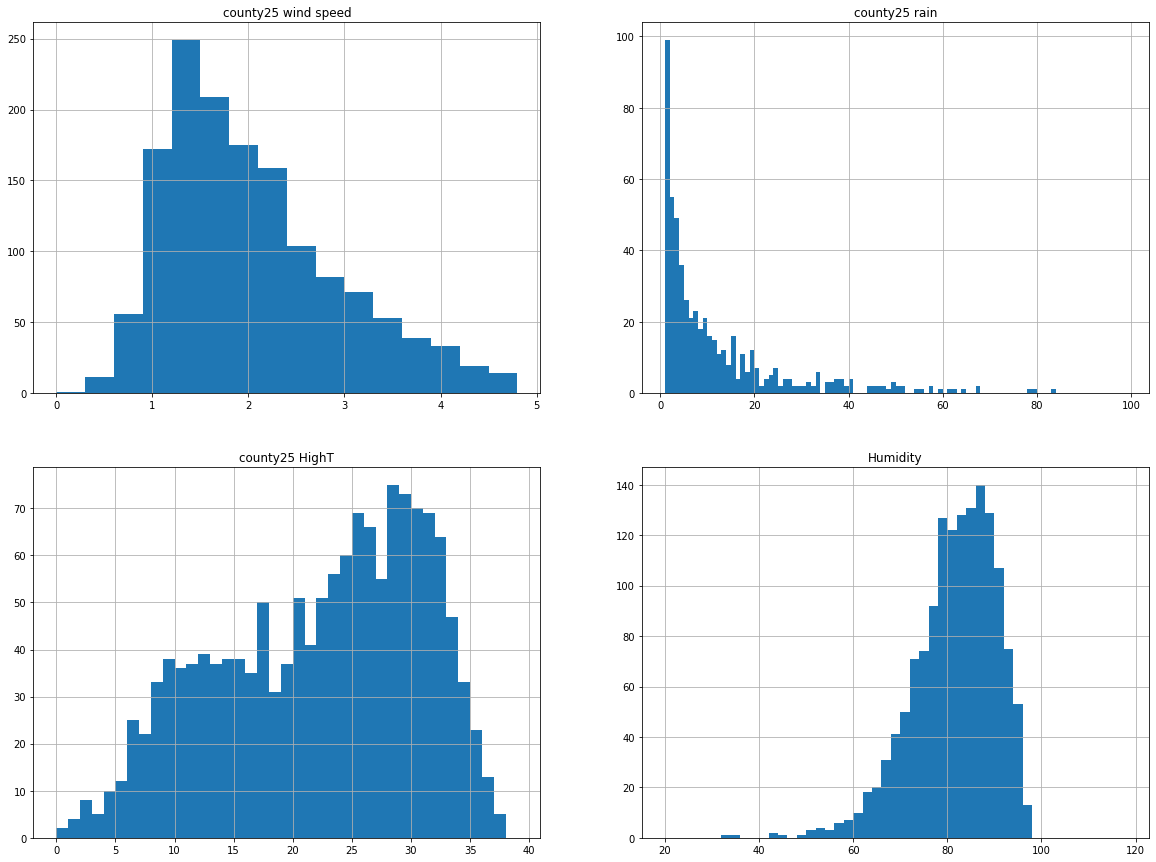

In [12]:
plt.figure(figsize=(20, 15))
plt.subplot(221)
ct_25.WindS.hist(bins=np.arange(0,5,0.3))
plt.title('county25 wind speed')
plt.subplot(222)
ct_25.Rain.hist(bins=np.arange(1, 100, 1))
plt.title('county25 rain')
plt.subplot(223)
ct_25.HighT.hist(bins=np.arange(0, 40, 1))
plt.title('county25 HighT')
plt.subplot(224)
ct_25.Humidity.hist(bins=np.arange(20,120,2))
plt.title('Humidity')

# 建模前期准备

## 连续型标准化，离散型数值化

In [3]:
need_scale_cloumns = ['Hours',  'WindS','Rain','HighT','LowT','MeanT','Humidity', 'Pressure' ]
value = w_df[need_scale_cloumns]

In [4]:
value

,Hours,WindS,Rain,HighT,LowT,MeanT,Humidity,Pressure
0,6.3,1.8,0.0,14.1,7.2,9.1,43.0,980.6
1,8.1,1.3,0.0,18.3,1.6,7.5,64.0,977.7
2,4.3,2.0,0.0,18.9,2.4,9.4,66.0,973.1
3,0.0,2.2,0.3,14.9,9.0,11.5,76.0,966.7
4,0.0,2.8,0.8,16.8,11.6,15.5,91.0,963.9
...,...,...,...,...,...,...,...,...
132946,1.0,4.0,0.0,21.6,17.7,19.5,87.0,1007.9
132947,0.0,5.3,0.0,18.2,13.6,15.9,85.0,1012.3
132948,0.0,6.7,0.2,13.6,10.6,11.7,82.0,1017.1
132949,0.0,7.8,0.0,12.2,6.8,8.0,85.0,1019.6
